# ProDS Advanced (중급) 샘플문항 풀이
- 문제 출처 https://certi.multicampus.com/ie/intro/sampleTest?p_menu=MTMxMDkjTUFJTg==&p_gubun=Qw==

- 마케팅 전략을 수립하기 위해 신용 카드 고객을 대상으로 고객 세분화(Customer Segmentation) 및 예측 모델링을 수행하고자 한다.

In [1]:
import numpy as np
import pandas as pd

## 0. 전처리

### 데이터 로드 및 확인

In [2]:
card0 = pd.read_csv("DS_Sample_1.csv")
card0

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000,201.802084,139.509787,0.000000,12
1,10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000,4103.032597,1072.340217,0.222222,12
2,10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500,622.066742,627.284787,0.000000,12
3,10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500,0.000000,NaN,0.000000,12
4,10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,11029,1250.394614,0.909091,443.99,443.99,0.00,0.000000,0.272727,0.272727,0.000000,0.000000,0,3,3500,273.823646,259.715939,0.000000,11
996,11030,9.503968,1.000000,96.62,0.00,96.62,0.000000,1.000000,0.000000,1.000000,0.000000,0,19,4500,1086.932525,92.217936,0.250000,12
997,11031,2285.068731,1.000000,0.00,0.00,0.00,1173.310874,0.000000,0.000000,0.000000,0.166667,5,0,2500,381.672065,1003.265207,0.000000,12
998,11032,2928.756699,1.000000,160.92,0.00,160.92,319.931964,1.000000,0.000000,1.000000,0.333333,5,12,3000,1142.847203,1098.479834,0.000000,12


In [3]:
card0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           1000 non-null   int64  
 1   BALANCE                           1000 non-null   float64
 2   BALANCE_FREQUENCY                 1000 non-null   float64
 3   PURCHASES                         1000 non-null   float64
 4   ONEOFF_PURCHASES                  1000 non-null   float64
 5   INSTALLMENTS_PURCHASES            1000 non-null   float64
 6   CASH_ADVANCE                      1000 non-null   float64
 7   PURCHASES_FREQUENCY               1000 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        1000 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  1000 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            1000 non-null   float64
 11  CASH_ADVANCE_TRX                  1000 non-null   int64  
 12  PURCHAS

In [4]:
card0.isna().sum()

CUST_ID                              0
BALANCE                              0
BALANCE_FREQUENCY                    0
PURCHASES                            0
ONEOFF_PURCHASES                     0
INSTALLMENTS_PURCHASES               0
CASH_ADVANCE                         0
PURCHASES_FREQUENCY                  0
ONEOFF_PURCHASES_FREQUENCY           0
PURCHASES_INSTALLMENTS_FREQUENCY     0
CASH_ADVANCE_FREQUENCY               0
CASH_ADVANCE_TRX                     0
PURCHASES_TRX                        0
CREDIT_LIMIT                         0
PAYMENTS                             0
MINIMUM_PAYMENTS                    74
PRC_FULL_PAYMENT                     0
TENURE                               0
dtype: int64

In [5]:
card0.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,926.000000,1000.000000,1000.000000
mean,10518.416000,2412.351396,0.906538,1652.230370,1054.210390,598.205220,1316.397606,0.521547,0.269678,0.376170,0.142861,3.500000,19.645000,6313.750000,2570.649055,1297.116322,0.129782,11.713000
std,299.190906,2795.390979,0.210538,3524.515043,2819.795174,1272.592078,2730.477215,0.406850,0.335454,0.407137,0.208752,7.647122,31.294669,4576.527947,4251.971043,2712.542504,0.278915,1.016693
min,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,8.561540,0.000000,6.000000
25%,10258.750000,356.519939,1.000000,70.802500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,2500.000000,502.218305,197.243952,0.000000,12.000000
50%,10521.500000,1464.258056,1.000000,564.445000,195.680000,100.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,9.000000,5000.000000,1236.370865,528.791003,0.000000,12.000000
75%,10776.250000,3421.553831,1.000000,1703.477500,1030.047500,688.080000,1623.252433,1.000000,0.416667,0.833333,0.250000,4.000000,24.000000,9000.000000,2841.838133,1368.612788,0.083333,12.000000
max,11033.000000,19043.138560,1.000000,49039.570000,40761.250000,12560.850000,27296.485760,1.000000,1.000000,1.000000,1.250000,123.000000,229.000000,28000.000000,46930.598240,38512.124770,1.000000,12.000000


- 분석을 수행하기 전, 상기 데이터를 이용하여 아래의 전처리를 수행하시오.
    - 단계 1 : ‘신용카드 한도(CREDIT_LIMIT)’와 ‘기한 내 최소 지불 금액(MINIMUM_PAYMENTS)’의 결측 값(Null)을 각 컬럼의 평균값으로 대체하시오. (배점 : 10점)

### 결측치 처리

In [6]:
card1 = card0.copy()

In [7]:
card1.loc[card1["CREDIT_LIMIT"].isna(), "CREDIT_LIMIT"] = card1["CREDIT_LIMIT"].mean()
card1.loc[card1["MINIMUM_PAYMENTS"].isna(), "MINIMUM_PAYMENTS"] = card1["MINIMUM_PAYMENTS"].mean()

In [8]:
card1.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
card1.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,10518.416000,2412.351396,0.906538,1652.230370,1054.210390,598.205220,1316.397606,0.521547,0.269678,0.376170,0.142861,3.500000,19.645000,6313.750000,2570.649055,1297.116322,0.129782,11.713000
std,299.190906,2795.390979,0.210538,3524.515043,2819.795174,1272.592078,2730.477215,0.406850,0.335454,0.407137,0.208752,7.647122,31.294669,4576.527947,4251.971043,2610.145241,0.278915,1.016693
min,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,8.561540,0.000000,6.000000
25%,10258.750000,356.519939,1.000000,70.802500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,2500.000000,502.218305,207.102535,0.000000,12.000000
50%,10521.500000,1464.258056,1.000000,564.445000,195.680000,100.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,9.000000,5000.000000,1236.370865,615.964930,0.000000,12.000000
75%,10776.250000,3421.553831,1.000000,1703.477500,1030.047500,688.080000,1623.252433,1.000000,0.416667,0.833333,0.250000,4.000000,24.000000,9000.000000,2841.838133,1297.986435,0.083333,12.000000
max,11033.000000,19043.138560,1.000000,49039.570000,40761.250000,12560.850000,27296.485760,1.000000,1.000000,1.000000,1.250000,123.000000,229.000000,28000.000000,46930.598240,38512.124770,1.000000,12.000000


- 상기 전처리를 완료한 데이터셋(데이터셋명: card1)을 이용하여 다음 1~3번 문제에 답하시오.

## 1. 상관분석

- (card1을 이용하여) ’연간 평균 잔고액(BALANCE)’이 많을수록, 그리고 ‘신용카드 서비스 이용기간(TENURE)’이 길수록 ‘신용카드 한도(CREDIT_LIMIT)’ 역시 높을 것으로 예상해볼 수 있다. 이들 변수 간의 관계를 파악하여, 추후 고객의 신용카드 한도 조정에 근거 자료로 활용하고자 한다.
-‘신용 카드 서비스 이용기간(TENURE)’ 별로 ‘연간 평균 잔고액(BALANCE)’과 ‘신용카드 한도(CREDIT_LIMIT)’ 간 피어슨(Pearson) 상관 계수를 계산하고, 이 중 가장 큰 값을 구하시오.
- 소수점 셋째 자리에서 반올림하여 소수점 둘째 자리까지 기술하시오. (답안예시 : 0.12)

In [10]:
card1.groupby("TENURE").corr()

CUST_ID   BALANCE  BALANCE_FREQUENCY  PURCHASES  \
TENURE                                                                       
6      CUST_ID            1.000000 -0.186725          -0.479395  -0.505032   
       BALANCE           -0.186725  1.000000           0.495666   0.401723   
       BALANCE_FREQUENCY -0.479395  0.495666           1.000000   0.246263   
       PURCHASES         -0.505032  0.401723           0.246263   1.000000   
       ONEOFF_PURCHASES  -0.473230  0.334527           0.182623   0.973394   
...                            ...       ...                ...        ...   
12     PURCHASES_TRX     -0.011982  0.177297           0.190118   0.684609   
       CREDIT_LIMIT      -0.059282  0.460833           0.019767   0.366567   
       PAYMENTS          -0.015191  0.345933           0.068804   0.724815   
       MINIMUM_PAYMENTS  -0.027993  0.447899           0.123844   0.154037   
       PRC_FULL_PAYMENT   0.016061 -0.309334          -0.075499   0.218361   

                          ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
TENURE                                                               
6      CUST_ID                   -0.473230               -0.510570   
       BALANCE                    0.334527                0.444727   
       BALANCE_FREQUENCY          0.182623                0.293305   
       PURCHASES                  0.973394                0.977467   
       ONEOFF_PURCHASES           1.000000                0.903091   
...                                    ...                     ...   
12     PURCHASES_TRX              0.544516                0.678029   
       CREDIT_LIMIT               0.329436                0.276899   
       PAYMENTS                   0.681981                0.478044   
       MINIMUM_PAYMENTS           0.109507                0.182073   
       PRC_FULL_PAYMENT           0.175606                0.211991   

                          CASH_ADVANCE  PURCHASES_FREQUENCY  \
TENURE                                                        
6      CUST_ID               -0.007902            -0.882585   
       BALANCE                0.850272             0.459542   
       BALANCE_FREQUENCY      0.521104             0.470625   
       PURCHASES              0.364848             0.525235   
       ONEOFF_PURCHASES       0.310697             0.459372   
...                                ...                  ...   
12     PURCHASES_TRX         -0.082574             0.590317   
       CREDIT_LIMIT           0.234707             0.170383   
       PAYMENTS               0.421040             0.203120   
       MINIMUM_PAYMENTS       0.099362             0.025512   
       PRC_FULL_PAYMENT      -0.112015             0.298978   

                          ONEOFF_PURCHASES_FREQUENCY  \
TENURE                                                 
6      CUST_ID                             -0.301318   
       BALANCE                              0.130694   
       BALANCE_FREQUENCY                   -0.167514   
       PURCHASES                            0.655018   
       ONEOFF_PURCHASES                     0.764088   
...                                              ...   
12     PURCHASES_TRX                        0.569191   
       CREDIT_LIMIT                         0.300585   
       PAYMENTS                             0.269317   
       MINIMUM_PAYMENTS                    -0.072809   
       PRC_FULL_PAYMENT                     0.270211   

                          PURCHASES_INSTALLMENTS_FREQUENCY  \
TENURE                                                       
6      CUST_ID                                   -0.799272   
       BALANCE                                    0.532502   
       BALANCE_FREQUENCY                          0.577054   
       PURCHASES                                  0.489686   
       ONEOFF_PURCHASES                           0.361387   
...                                                    ...   
12     PURCHASES_TRX                              0.5658

In [11]:
cor = card1.groupby("TENURE")[["BALANCE", "CREDIT_LIMIT"]].corr()
cor

BALANCE  CREDIT_LIMIT
TENURE                                     
6      BALANCE       1.000000      0.868056
       CREDIT_LIMIT  0.868056      1.000000
7      BALANCE       1.000000      0.948405
       CREDIT_LIMIT  0.948405      1.000000
8      BALANCE       1.000000      0.820696
       CREDIT_LIMIT  0.820696      1.000000
9      BALANCE       1.000000      0.085474
       CREDIT_LIMIT  0.085474      1.000000
10     BALANCE       1.000000      0.291482
       CREDIT_LIMIT  0.291482      1.000000
11     BALANCE       1.000000      0.380360
       CREDIT_LIMIT  0.380360      1.000000
12     BALANCE       1.000000      0.460833
       CREDIT_LIMIT  0.460833      1.000000

In [12]:
ans1 = 0.94
ans1

0.94

## 2. 군집분석

- (card1을 이용하여) 신용카드 판매 전략을 수립하기 위해 고객 세분화(Customer Segmentation) 를 수행할 수 있다. 일시불 구매 금액이 높은 고객 Segment를 도출하기 위해 다음 단계에 따라 분석을 수행하고 질문에 답하시오. (배점 : 10점)

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

### 2-1. 표준화

- 단계 1: ‘고객 ID(CUST_ID)’를 제외한 모든 변수(17개)에 대해 Z-score 표준화(Standardization) 한다.

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()
card1_sc = sc.fit_transform(card1.drop("CUST_ID", axis=1))
card1_sc

array([[-0.84876759, -0.41987944, -0.4419358 , ..., -0.44372465,
        -0.46554357,  0.28242902],
       [ 0.28279099,  0.01213096, -0.4690169 , ..., -0.08615941,
         0.33159169,  0.28242902],
       [ 0.0296341 ,  0.44414137, -0.24953794, ..., -0.25675456,
        -0.46554357,  0.28242902],
       ...,
       [-0.04555583,  0.44414137, -0.4690169 , ..., -0.1126367 ,
        -0.46554357,  0.28242902],
       [ 0.18482699,  0.44414137, -0.4233367 , ..., -0.07613978,
        -0.46554357,  0.28242902],
       [-0.34079285,  0.44414137, -0.20275918, ...,  0.00909944,
        -0.46554357,  0.28242902]])

### 2-2. K-means clustering

- 단계 2: 표준화된 변수들에 대해 K-means 군집 분석을 수행한다. 이 때, 군집 수는 2~5개 중 K-means Silhouette 를 통해 구한 최적의 K로 설정한다.

In [16]:
kmeans = []
silhouette = []
for k in range(2,6):
    km = KMeans(n_clusters=k, random_state=1234)
    km.fit(card1_sc)
    kmeans.append(km)
    silhouette.append(silhouette_score(card1_sc, km.labels_, random_state=1234))

In [17]:
kmeans_result = pd.DataFrame(silhouette, columns=["silhouette score"], index=range(2,6))
kmeans_result

,silhouette score
2,0.307528
3,0.196361
4,0.207151
5,0.192741


- silhouette score 결과, 적절한 군집의 수는 2개다.

### 2-3. 군집별 ONEOFF_PURCHASES 평균

- 단계 3: 단계 2에서 도출한 각 군집 별로 ‘일시불 구매 총액(ONEOFF_PURCHASES)’의 평균을 계산한다.

In [18]:
km2 = KMeans(n_clusters=2, random_state=1234).fit(card1_sc)
card1['CLUSTER'] = km2.labels_
oneoff_cluster = card1.groupby('CLUSTER').mean()["ONEOFF_PURCHASES"]
oneoff_cluster

CLUSTER
0     340.230998
1    3946.187525
Name: ONEOFF_PURCHASES, dtype: float64

### 2-4. 군집별 ONEOFF_PURCHASES의 평균 중 최댓값

- 군집 별 ‘일시불 구매 총액(ONEOFF_PURCHASES)’의 평균 중 가장 큰 값을 구하시오.

In [19]:
ans2 = max(oneoff_cluster)
round(ans2, 2)

3946.19

## 3. 회귀분석

- (card1을 이용하여) 이번에는 ‘일시불 구매 총액(ONEOFF_PURCHASES)’ 예측 모델을 Target Marketing에 활용하고자 한다. 다음 단계에 따라 분석을 수행하고 질문에 답하시오. (배점 : 15점)

In [20]:
from sklearn.tree import DecisionTreeRegressor

### 3-1. dataset 분할

- 단계 1: ‘고객 ID(CUST_ID)’가 4의 배수가 아닌 데이터를 Train Set으로, 4의 배수인 데이터를 Test Set으로 분할한다.

In [21]:
train = card1.loc[card1["CUST_ID"] % 4 != 0, :]
test = card1.loc[card1["CUST_ID"] % 4 == 0, :]

In [22]:
train

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
4,10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,11027,2845.160430,0.727273,735.09,652.94,82.15,0.000000,0.666667,0.250000,0.333333,0.000000,0,8,10500.0,6006.492582,888.901116,0.000000,12,0
995,11029,1250.394614,0.909091,443.99,443.99,0.00,0.000000,0.272727,0.272727,0.000000,0.000000,0,3,3500.0,273.823646,259.715939,0.000000,11,0
996,11030,9.503968,1.000000,96.62,0.00,96.62,0.000000,1.000000,0.000000,1.000000,0.000000,0,19,4500.0,1086.932525,92.217936,0.250000,12,0
997,11031,2285.068731,1.000000,0.00,0.00,0.00,1173.310874,0.000000,0.000000,0.000000,0.166667,5,0,2500.0,381.672065,1003.265207,0.000000,12,0


In [23]:
test

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
3,10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,1297.116322,0.0,12,0
7,10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.0,12,0
11,10012,630.794744,0.818182,1492.18,1492.18,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,2000.0,705.618627,155.549069,0.0,12,0
15,10016,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.0,12,0
19,10020,3577.970933,1.000000,398.64,0.00,398.64,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4000.0,1053.980464,12465.549380,0.0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,11016,357.627180,1.000000,3070.45,1864.11,1206.34,0.000000,0.916667,0.916667,0.416667,0.000000,0,20,18500.0,4023.111073,169.763154,1.0,12,1
986,11020,1055.532070,1.000000,170.00,0.00,170.00,0.000000,0.250000,0.000000,0.166667,0.000000,0,3,1200.0,229.301004,299.351881,0.0,12,0
990,11024,1532.278572,1.000000,2612.10,1375.50,1236.60,0.000000,0.916667,0.916667,0.750000,0.000000,0,135,6500.0,1348.321843,433.618672,0.0,12,1
994,11028,1268.352178,1.000000,1533.28,0.00,1533.28,2294.002357,1.000000,0.000000,0.916667,0.333333,8,20,1200.0,3363.275481,2639.292970,0.0,12,0


### 3-2. decision tree regressor 학습

- 단계 2: Train Set으로 아래 조건에 따라 의사결정나무 회귀모델을 학습한다.
    - 독립 변수(총 16개): ‘고객 ID(CUST_ID)’, ‘일시불 구매 총액(ONEOFF_PURCHASES)’을 제외한 모든 컬럼
    - 종속 변수: ‘일시불 구매 총액(ONEOFF_PURCHASES)’

In [24]:
X_train = train.drop(["CUST_ID", "ONEOFF_PURCHASES"], axis=1)
y_train = train["ONEOFF_PURCHASES"]
X_test = test.drop(["CUST_ID", "ONEOFF_PURCHASES"], axis=1)
y_test = test["ONEOFF_PURCHASES"]

In [25]:
DTR = DecisionTreeRegressor(random_state=1234)
DTR.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1234)

### 3-3. decision tree regressor 예측

- 단계 3: 생성된 모델을 Test Set에 적용하여 ‘일시불 구매 총액(ONEOFF_PURCHASES)’을 예측한다.

In [26]:
pred = DTR.predict(X_test)
pd.DataFrame({"true": y_test, "predicted": pred})

,true,predicted
3,1499.00,1508.54
7,0.00,0.00
11,1492.18,1462.35
15,0.00,0.00
19,0.00,0.00
...,...,...
982,1864.11,1540.41
986,0.00,0.00
990,1375.50,1282.85
994,0.00,0.00


### 3-4. 예측 결과 평가

- 단계 3에서 얻은 예측 결과를 평가하기 위해, 아래 정의된 Measure B를 구하시오.

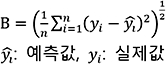

In [27]:
B = (sum((y_test - pred) ** 2) / len(y_test)) ** 0.5
round(B, 1)

1253.4

- 참고: Measure B는 RMSE(Root Mean Squared Error)를 뜻하며, scikit-learn의 mean_squared_error metric을 통해서도 구할 수 있다.

In [28]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, pred))

1253.3636989889028